## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Create Synthetic Dataset for Classification

We'll start with a classification problem to demonstrate Gradient Boosting.

In [2]:
# Create synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                          n_redundant=5, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Class distribution in training set: {np.bincount(y_train)}")

Training set size: (700, 20)
Testing set size: (300, 20)
Number of features: 20
Class distribution in training set: [342 358]


## Step 3: Train Gradient Boosting Classifier

We'll create a Gradient Boosting model with key hyperparameters.

In [3]:
# Create Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Shrinks contribution of each tree
    max_depth=3,             # Maximum depth of individual trees
    min_samples_split=2,     # Minimum samples to split a node
    min_samples_leaf=1,      # Minimum samples in leaf node
    subsample=1.0,           # Fraction of samples for fitting trees
    random_state=42
)

# Train the model
gb_classifier.fit(X_train, y_train)

print("Gradient Boosting Classifier trained successfully!")
print(f"Number of estimators: {gb_classifier.n_estimators}")
print(f"Learning rate: {gb_classifier.learning_rate}")
print(f"Max depth: {gb_classifier.max_depth}")

Gradient Boosting Classifier trained successfully!
Number of estimators: 100
Learning rate: 0.1
Max depth: 3


## Step 4: Make Predictions and Evaluate

Let's evaluate the model's performance on training and test sets.

In [4]:
# Make predictions
y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model Performance:")
print("="*60)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")
print("="*60)

print("\nClassification Report (Test Set):")
print("="*60)
print(classification_report(y_test, y_test_pred))

Model Performance:
Training Accuracy: 0.9971
Testing Accuracy:  0.8867

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       160
           1       0.86      0.91      0.88       140

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## Step 5: Visualize Confusion Matrix

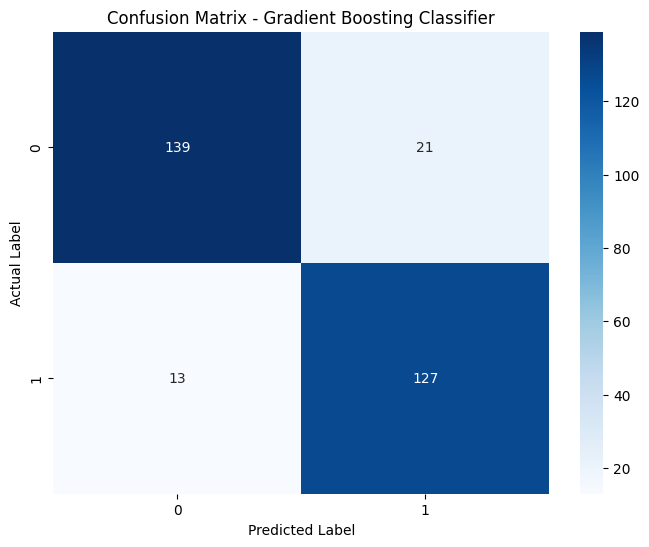


Confusion Matrix:
[[139  21]
 [ 13 127]]


In [5]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print(f"\nConfusion Matrix:")
print(cm)

## Step 6: Feature Importance Analysis

One of the benefits of Gradient Boosting is that it provides feature importance scores.

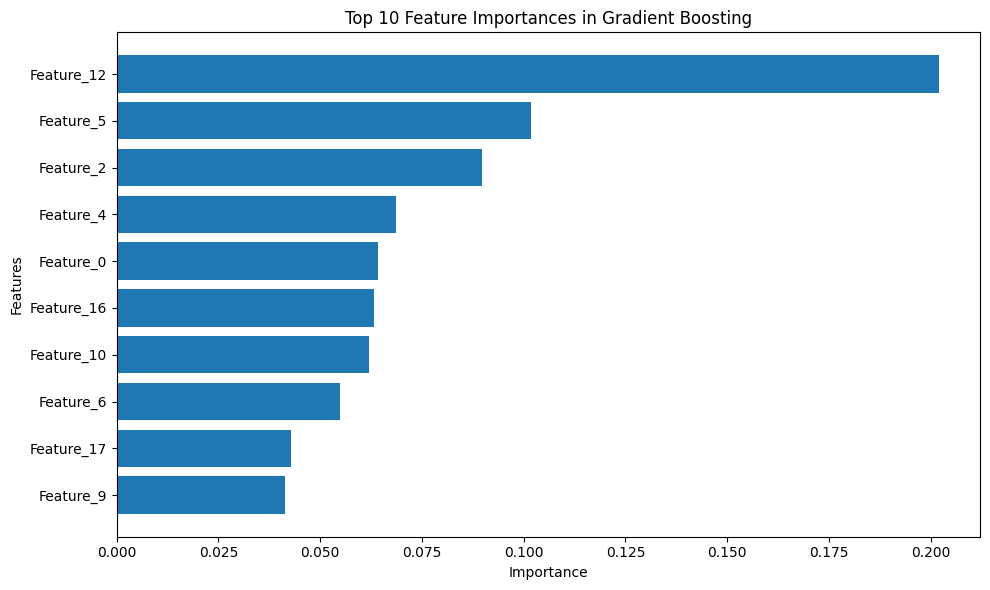

Top 10 Most Important Features:
       Feature  Importance
12  Feature_12    0.202032
5    Feature_5    0.101687
2    Feature_2    0.089885
4    Feature_4    0.068727
0    Feature_0    0.064334
16  Feature_16    0.063180
10  Feature_10    0.061910
6    Feature_6    0.054779
17  Feature_17    0.042736
9    Feature_9    0.041467


In [6]:
# Get feature importances
feature_importance = gb_classifier.feature_importances_

# Create dataframe for visualization
feature_df = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(len(feature_importance))],
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'][:10][::-1], feature_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in Gradient Boosting')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_df.head(10))

## Step 7: Training Deviance (Loss) Over Iterations

Let's visualize how the loss decreases as we add more trees.

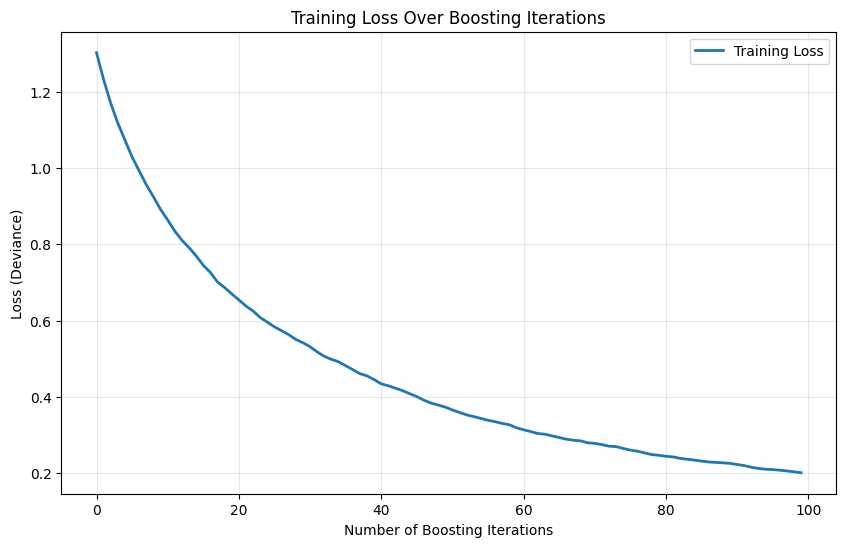

Initial loss: 1.3020
Final loss: 0.2014
Loss reduction: 1.1006


In [7]:
# Plot training deviance
plt.figure(figsize=(10, 6))
plt.plot(gb_classifier.train_score_, label='Training Loss', linewidth=2)
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Loss (Deviance)')
plt.title('Training Loss Over Boosting Iterations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Initial loss: {gb_classifier.train_score_[0]:.4f}")
print(f"Final loss: {gb_classifier.train_score_[-1]:.4f}")
print(f"Loss reduction: {gb_classifier.train_score_[0] - gb_classifier.train_score_[-1]:.4f}")

## Step 8: Effect of Number of Estimators

Let's see how performance changes with different numbers of trees.

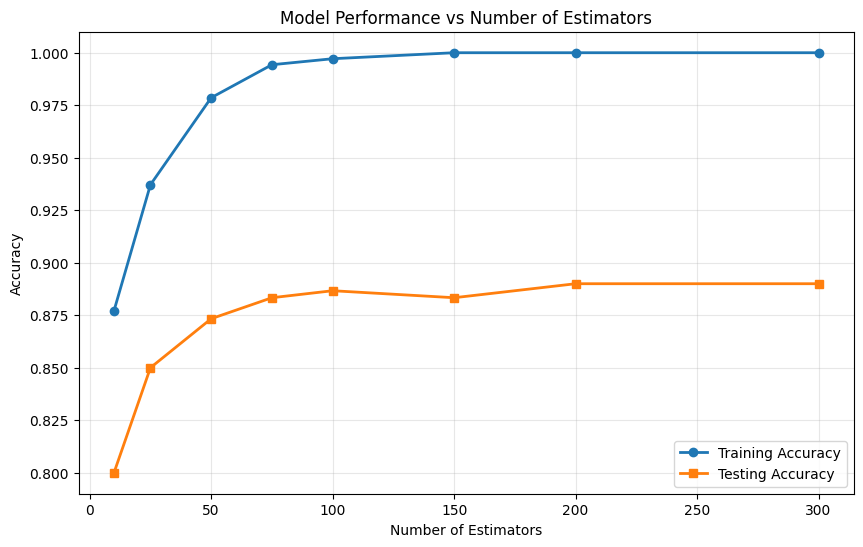

Performance by Number of Estimators:
n_estimators= 10: Train=0.8771, Test=0.8000
n_estimators= 25: Train=0.9371, Test=0.8500
n_estimators= 50: Train=0.9786, Test=0.8733
n_estimators= 75: Train=0.9943, Test=0.8833
n_estimators=100: Train=0.9971, Test=0.8867
n_estimators=150: Train=1.0000, Test=0.8833
n_estimators=200: Train=1.0000, Test=0.8900
n_estimators=300: Train=1.0000, Test=0.8900


In [8]:
# Test different numbers of estimators
n_estimators_range = [10, 25, 50, 75, 100, 150, 200, 300]
train_scores = []
test_scores = []

for n_est in n_estimators_range:
    gb = GradientBoostingClassifier(
        n_estimators=n_est,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    gb.fit(X_train, y_train)
    
    train_scores.append(gb.score(X_train, y_train))
    test_scores.append(gb.score(X_test, y_test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(n_estimators_range, test_scores, marker='s', label='Testing Accuracy', linewidth=2)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Number of Estimators')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Performance by Number of Estimators:")
print("="*60)
for n_est, train_acc, test_acc in zip(n_estimators_range, train_scores, test_scores):
    print(f"n_estimators={n_est:3d}: Train={train_acc:.4f}, Test={test_acc:.4f}")

## Step 9: Effect of Learning Rate

The learning rate controls how much each tree contributes to the final prediction.

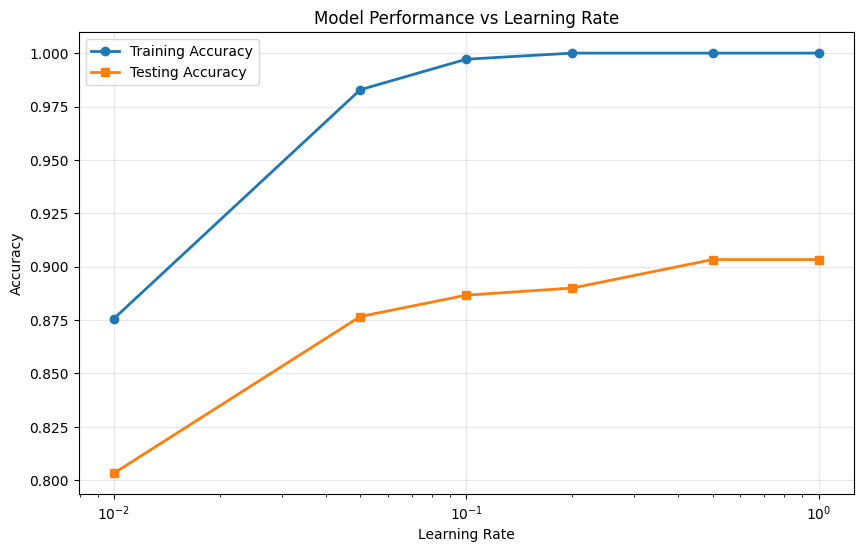

Performance by Learning Rate:
learning_rate=0.01: Train=0.8757, Test=0.8033
learning_rate=0.05: Train=0.9829, Test=0.8767
learning_rate=0.10: Train=0.9971, Test=0.8867
learning_rate=0.20: Train=1.0000, Test=0.8900
learning_rate=0.50: Train=1.0000, Test=0.9033
learning_rate=1.00: Train=1.0000, Test=0.9033


In [9]:
# Test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
train_scores_lr = []
test_scores_lr = []

for lr in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    gb.fit(X_train, y_train)
    
    train_scores_lr.append(gb.score(X_train, y_train))
    test_scores_lr.append(gb.score(X_test, y_test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_scores_lr, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(learning_rates, test_scores_lr, marker='s', label='Testing Accuracy', linewidth=2)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Learning Rate')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Performance by Learning Rate:")
print("="*60)
for lr, train_acc, test_acc in zip(learning_rates, train_scores_lr, test_scores_lr):
    print(f"learning_rate={lr:.2f}: Train={train_acc:.4f}, Test={test_acc:.4f}")

## Step 10: Effect of Max Depth

Tree depth controls the complexity of each individual weak learner.

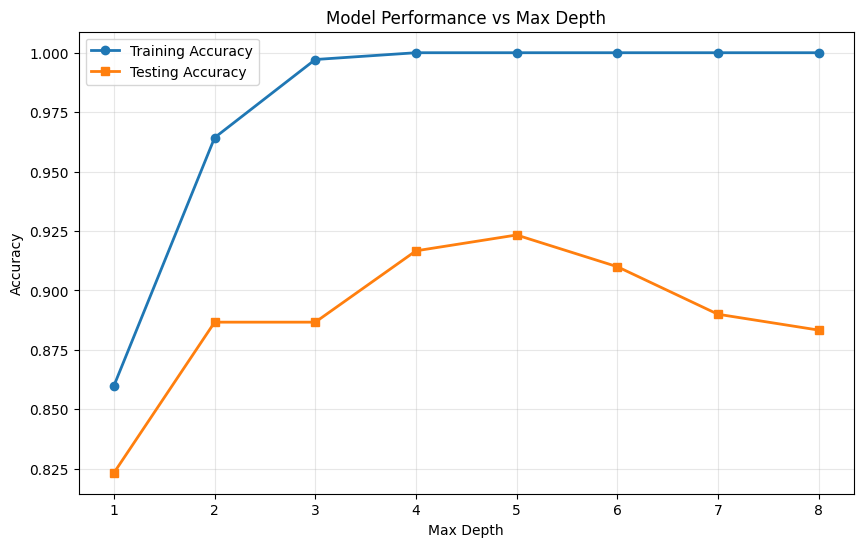

Performance by Max Depth:
max_depth=1: Train=0.8600, Test=0.8233
max_depth=2: Train=0.9643, Test=0.8867
max_depth=3: Train=0.9971, Test=0.8867
max_depth=4: Train=1.0000, Test=0.9167
max_depth=5: Train=1.0000, Test=0.9233
max_depth=6: Train=1.0000, Test=0.9100
max_depth=7: Train=1.0000, Test=0.8900
max_depth=8: Train=1.0000, Test=0.8833


In [10]:
# Test different max depths
max_depths = [1, 2, 3, 4, 5, 6, 7, 8]
train_scores_depth = []
test_scores_depth = []

for depth in max_depths:
    gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=depth,
        random_state=42
    )
    gb.fit(X_train, y_train)
    
    train_scores_depth.append(gb.score(X_train, y_train))
    test_scores_depth.append(gb.score(X_test, y_test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores_depth, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(max_depths, test_scores_depth, marker='s', label='Testing Accuracy', linewidth=2)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(max_depths)
plt.show()

print("Performance by Max Depth:")
print("="*60)
for depth, train_acc, test_acc in zip(max_depths, train_scores_depth, test_scores_depth):
    print(f"max_depth={depth}: Train={train_acc:.4f}, Test={test_acc:.4f}")

## Step 11: Gradient Boosting for Regression

Let's demonstrate Gradient Boosting on a regression problem.

Gradient Boosting Regression Results:
Mean Squared Error (MSE):  770.3254
Root Mean Squared Error (RMSE): 27.7547
Mean Absolute Error (MAE): 21.4985
R² Score: 0.9343


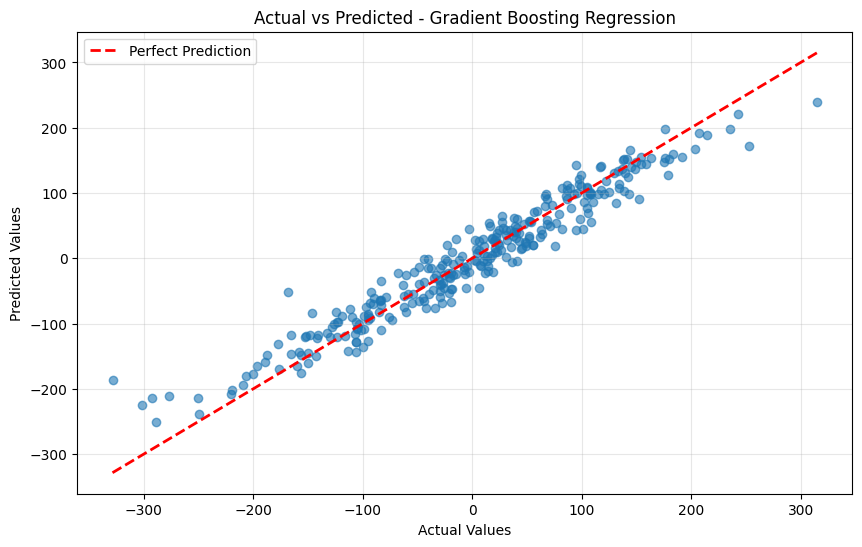

In [11]:
# Create regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, n_informative=8,
                               noise=10, random_state=42)

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Train Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = gb_regressor.predict(X_test_reg)

# Evaluate
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Gradient Boosting Regression Results:")
print("="*60)
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print("="*60)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Gradient Boosting Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Key Parameters in Gradient Boosting:

### Tree Structure Parameters:
- **n_estimators**: Number of boosting stages (trees) to build
- **max_depth**: Maximum depth of individual trees (3-8 recommended)
- **min_samples_split**: Minimum samples required to split a node
- **min_samples_leaf**: Minimum samples required in a leaf node

### Learning Parameters:
- **learning_rate**: Shrinkage parameter (0.01-0.3 typical, lower is better with more trees)
- **subsample**: Fraction of samples to use for fitting trees (< 1.0 adds stochasticity)
- **loss**: Loss function to optimize ('log_loss' for classification, 'squared_error' for regression)

### Other Parameters:
- **random_state**: Seed for reproducibility
- **max_features**: Number of features to consider for best split
- **validation_fraction**: Fraction of data for early stopping

## Best Practices:

1. **Start with these defaults**:
   - n_estimators: 100
   - learning_rate: 0.1
   - max_depth: 3

2. **Trade-off between n_estimators and learning_rate**:
   - Lower learning rate → More trees needed
   - Higher learning rate → Fewer trees, risk of overfitting

3. **Prevent overfitting**:
   - Limit max_depth (3-5 is often sufficient)
   - Use subsample < 1.0 (0.8 is common)
   - Increase min_samples_split and min_samples_leaf
   - Lower learning rate with more estimators

4. **Tune in this order**:
   1. Learning rate and n_estimators
   2. max_depth
   3. min_samples_split and min_samples_leaf
   4. subsample

## Conclusion:

Gradient Boosting is a powerful algorithm that:
- Builds strong models by combining weak learners sequentially
- Excels at both classification and regression tasks
- Provides excellent predictive performance
- Requires careful tuning to avoid overfitting
- Works well with tabular data

**Key Insight**: The magic of Gradient Boosting lies in its ability to learn from mistakes - each new tree focuses on correcting the errors of previous trees, leading to a highly accurate ensemble model!

For production use, consider modern implementations like **XGBoost**, **LightGBM**, or **CatBoost** which offer:
- Faster training
- Better handling of missing values
- Built-in regularization
- GPU support